# BIL 366 Data Mining: Homework-1
### Bilinmesi gerekenler
data exploration,
pandas,numpy, matplotlib.pyplot
### Öğrenme Hedefleri 
Pandas kullanılarak temel data exploration ve visualization


### Giriş
Covid süresince Türkiye location datasından Google'in elde etmiş olduğu mobility datası https://www.google.com/covid19/mobility/ sitesi üzerinden yayınlanmıştır.
Bu ödevde sizden bu datayla ilgili önanaliz yapıp raporlamanız istenmektedir. Datayı indirme ve yüklemede bir bütünlük olması açısından bu datayı drive üzerinden erişime açtım, aşağıdaki şekilde erişebilirsiniz.



In [1]:
import pandas as pd

#https://www.google.com/covid19/mobility/
url='https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 167657 non-null  object 
 1   country_region                                      167657 non-null  object 
 2   sub_region_1                                        167336 non-null  object 
 3   sub_region_2                                        141692 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     25644 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            167657 non-null  object 
 8   date                                                167657 non-n

### Yapılacaklar

####1.
Data üzerinde 5li özet istatiski bilgileri gösteriniz. 

In [3]:
import matplotlib.pyplot as plt
a = df.describe()
a
# ilk üç bilgi bizim için gerekli değil
a[3:8].fillna(0)

,metro_area,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
min,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-94.0,-28.0
25%,0.0,0.0,-44.0,-9.0,-26.0,-48.0,-30.0,1.0
50%,0.0,0.0,-24.0,5.0,2.0,-25.0,-17.0,5.0
75%,0.0,0.0,-8.0,18.0,30.0,-5.0,-6.0,12.0
max,0.0,0.0,333.0,321.0,694.0,318.0,136.0,50.0


####2.
Bu datadaki [9-14] sütunlarını birbirlerine karşı scatter plot ile çizerek aralarında herhangi bir correlation(positive, negative, none) olup olmadığını belirleyiniz. (fig, axs = plt.subplots(5,3) kullanabilirsiniz) 

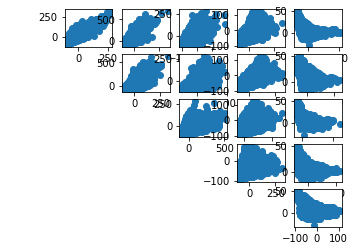

In [14]:
ig, axes = plt.subplots(nrows=5,ncols=6)

for i in range(5):
    for j in range(6):
        if i >= j:
            axes[i,j].axis('off')
            continue
        axes[i,j].scatter(df.iloc[:, 9 + i], df.iloc[:, 9 + j])



####3.
Bu datadaki [9-14] sütunlarını boxplot ile çizirek hangi sütünda outlier olup olmadığını belirleyiniz.
  
  Örnek 
  
 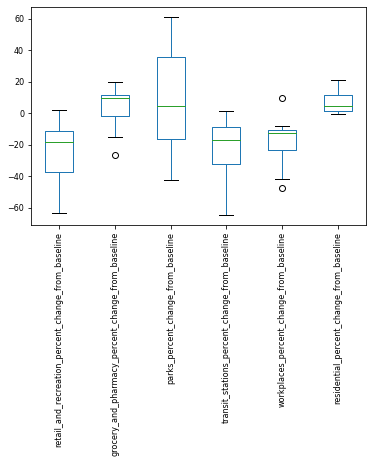



<AxesSubplot:>

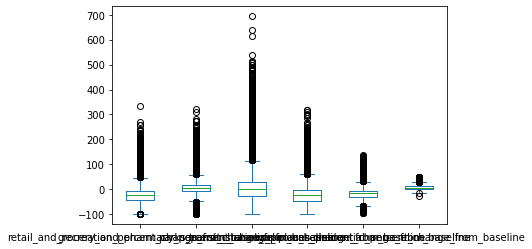

In [23]:
#tüm siyah çemberler outlier
df.iloc[:,9:15].plot(kind = "box")


RangeIndex(start=0, stop=167657, step=1)
0        2020-02-15
1        2020-02-16
2        2020-02-17
3        2020-02-18
4        2020-02-19
            ...    
167652   2020-12-27
167653   2020-12-28
167654   2020-12-29
167655   2020-12-30
167656   2020-12-31
Name: date, Length: 167657, dtype: datetime64[ns]
Int64Index([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', length=167657)
RangeIndex(start=0, stop=167657, step=1)
Int64Index([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', length=167657)


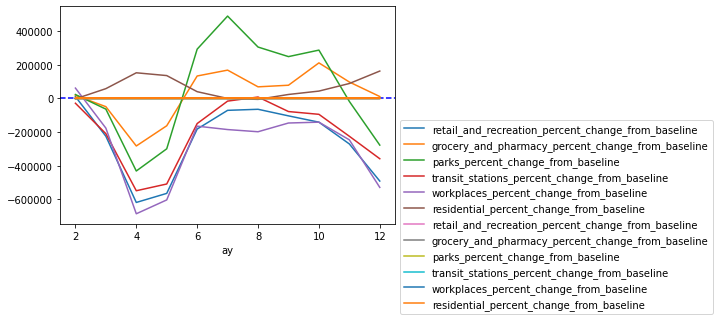

In [14]:
import numpy as np
import matplotlib.pyplot as plt

print(df.index)
# summed_df = df.groupby([pd.Grouper(freq='1M'), 'category']).sum()
date_series = pd.to_datetime(df['date'])
print(date_series)
date_index = pd.DatetimeIndex(date_series.values).month
print(date_index)
print(df.index)
df2 = df.set_index(date_index)
print(df2.index)
df2.index.name = 'ay'
df2 = df2.iloc[:, 9:15]
df2
df2= df2.fillna(0)
figure, ax = plt.subplots(1, 1)
df2.groupby('ay').sum().plot(ax=ax).axhline(color="blue", linestyle="--")
df2.plot(ax=ax).legend(bbox_to_anchor=(1.0, 0.5))




####4.
Dataframe'i 8.sütun ('date') sütununda aylara göre gruplayarak [9-14] sütunlarını aşağıdakine benzer şekilde plot ediniz (groupby ve DatetimeIndex kullanarak yapabilirsiniz).

Örnek
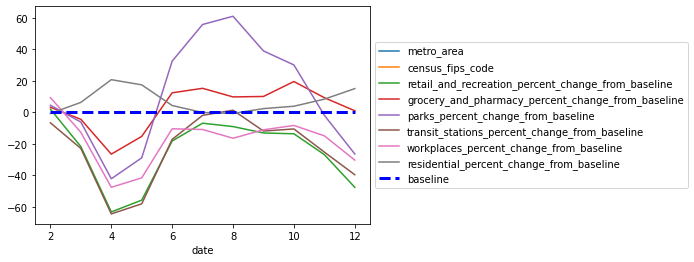




####5.
https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing  adresinde 2021 TR datası vardır. Bu datayıda 4.deki gibi gruplayarak, her iki datayı karşılaştırmak için aynı indeksli sütunlarını aylara göre aynı plotta gösteriniz. 

Örnek

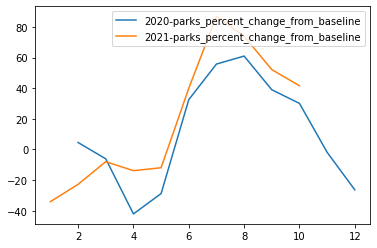

'parks_percent_change_from_baseline'

retail_and_recreation_percent_change_from_baseline 2020
-----------------------


KeyError: 'month'

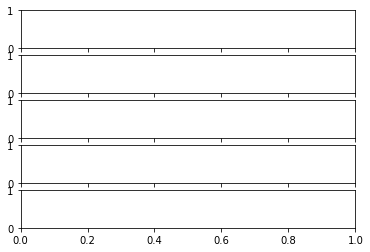

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

url5 = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'

url5_download ='https://drive.google.com/uc?id=' + url5.split('/')[-2]
df5 = pd.read_csv(url5_download)
df5

date_series_5 = pd.to_datetime(df5['date'])
date_index_5 = pd.DatetimeIndex(date_series_5.values).month

df5_2 = df5.set_index(date_index_5)

df5_2.index.name = 'month'
df5_2 = df5_2.iloc[:, 9:15].fillna(0)

for index in range(len(df2.columns)):
     df2.columns.values[index] = df2.columns.values[index] +" 2020"

print(df2.iloc[:, 0].name)
print("-----------------------")

for index in range(len(df5_2.columns)):
    df5_2.columns.values[index] = df5_2.columns.values[index] + " 2021"

fig, axes = plt.subplots(sharex=True, nrows=len(df5_2.columns))
for index in range(1, len(df2.columns)):
    df2.iloc[:, index].groupby('month').sum().plot(ax=axes[index-1]).legend(bbox_to_anchor=(1.0, 0.5))
    df5_2.iloc[:, index-1].groupby('month').sum().plot(ax = axes[index-1]).legend(bbox_to_anchor=(1.0, 0.5))

# # 2020'nin 0. indexi 2021 içerisinde yer almıyor o yüzden 2020'de 0'dan 2021'de ise 1. indexten başlıyoruz
# figure, graphes = plt.subplots(sharex=True, nrows=5)
# df2.iloc[:, 0].groupby('month').sum().plot(ax=graphes[0]).legend(bbox_to_anchor=(1.0, 0.5))
# df5_2.iloc[:, 0].groupby('month').sum().plot(ax=graphes[0]).legend(bbox_to_anchor=(1.0, 0.5))
# df2.iloc[:, 1].groupby('month').sum().plot(ax=graphes[1]).legend(bbox_to_anchor=(1.0, 0.5))
# df5_2.iloc[:, 2].groupby('month').sum().plot(ax=graphes[1]).legend(bbox_to_anchor=(1.0, 0.5))
# df2.iloc[:, 2].groupby('month').sum().plot(ax=graphes[2]).legend(bbox_to_anchor=(1.0, 0.5))
# df5_2.iloc[:, 3].groupby('month').sum().plot(ax=graphes[2]).legend(bbox_to_anchor=(1.0, 0.5))
# df2.iloc[:, 3].groupby('month').sum().plot(ax=graphes[3]).legend(bbox_to_anchor=(1.0, 0.5))
# df5_2.iloc[:, 4].groupby('month').sum().plot(ax=graphes[3]).legend(bbox_to_anchor=(1.0, 0.5))
# df2.iloc[:, 4].groupby('month').sum().plot(ax=graphes[4]).legend(bbox_to_anchor=(1.0, 0.5))
# df2.iloc[:, 5].groupby('month').sum().plot(ax=graphes[5]).legend(bbox_to_anchor=(1.0, 0.5))
# df5_2.iloc[:, 5].groupby('month').sum().plot(ax=graphes[5]).legend(bbox_to_anchor=(1.0, 0.5))


### Teslim
Her sorunun altında **hem kodu ve hemde çıktısını** içeren Jupiter notebook dökümanını **pdfe** çevirerek classroom üzerinden teslim ediniz(colab de direk print ile pdf alabilirsiniz).


### Değerlendirme
**Her soru 20 puandır.**